# SI Model （suitable for incurable infective disease)

In [13]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.5
# Recovery rate
gamma = 0
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0]
# Initial susceptible and infective ratio
INI = (s[0],i[0])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

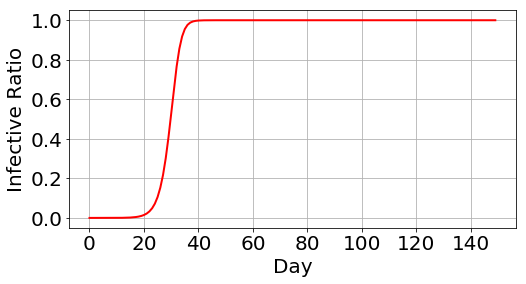

In [4]:
# Rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t])

# Infective rate plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

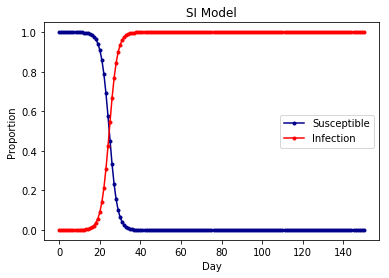

In [4]:
# Susceptible and infective population proportion
def funcSI(prop,_):
    Y = np.zeros(2) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + gamma * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSI,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SI Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIS Model 
### (recovered individual still susceptible)

In [5]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0]
# Initial susceptible and infective ratio
INI = (s[0],i[0])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

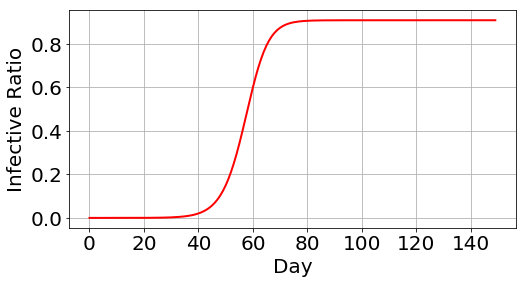

In [7]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t]) - gamma*i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

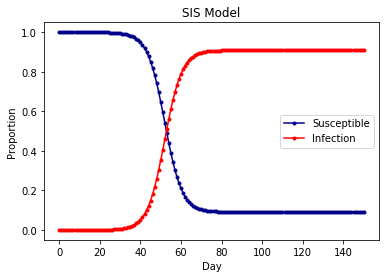

In [8]:
# Susceptible and infective population proportion
def funcSIS(prop,_):
    Y = np.zeros(2) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + gamma * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIS,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SIS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIR Model 
### (recovered individual with lifelong immunity)

In [9]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],r[0])

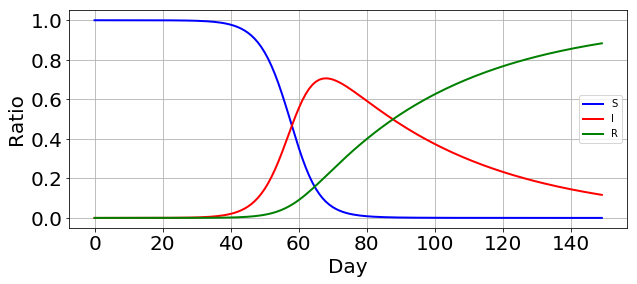

In [11]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma*i[t]
    s[t + 1] = s[t] - i[t] * lamda * s[t]
    r[t + 1] = r[t] + gamma*i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

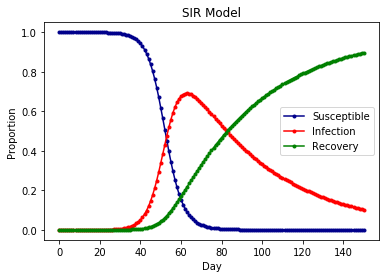

In [12]:
# Susceptible, infective, recovery population proportion
def funcSIR(prop,_):
    Y = np.zeros(3) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    # Remove proportion change
    Y[2] = gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIR,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green', label = 'Recovery',marker = '.')
plt.title('SIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIRS Model 
### （recovered individual with waning immunity)

In [13]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Immunity waning rate
alpha = 0.6
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],r[0])

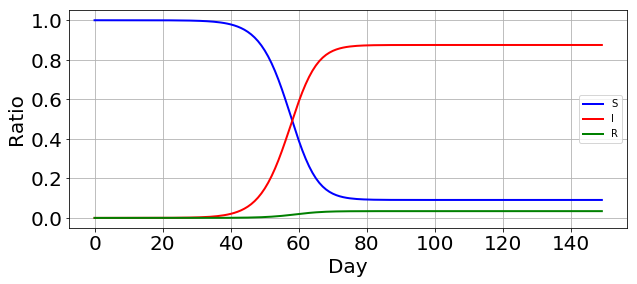

In [15]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma*i[t]
    s[t + 1] = s[t] - i[t] * lamda * s[t] + alpha * r[t]
    r[t + 1] = r[t] + gamma*i[t] - alpha * r[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

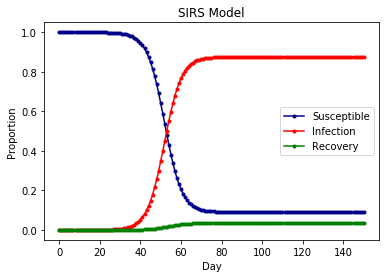

In [16]:
# Susceptible and infective population proportion
def funcSIRS(prop,_):
    Y = np.zeros(3) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + alpha * X[2]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    # Remove proportion change
    Y[2] = gamma * X[1] - alpha * X[2]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIRS,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green', label = 'Recovery',marker = '.')
plt.title('SIRS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIR Model

In [17]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Exposed to infective rate
sigma = 1/4
# Recovery rate
gamma = 0.0235
# Immunity waning rate
# alpha = 0.6

# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 5.0 / N
# Exposed ratio
e = np.zeros([T])
# Initial exposed ratio
e[0] = 40.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - e[0] - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],e[0],r[0])

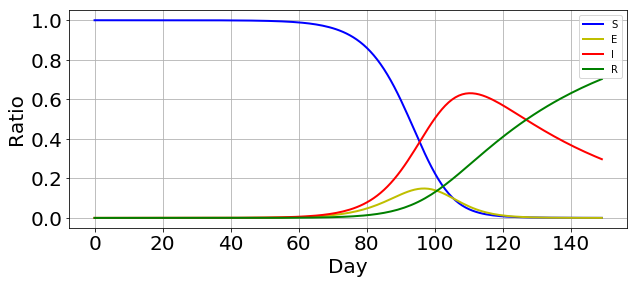

In [19]:
# Infective rate 
for t in range(T-1):
    s[t + 1] = s[t] - i[t] * lamda * s[t] 
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t]
    r[t + 1] = r[t] + gamma * i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(e, c='y', lw=2, label='E')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

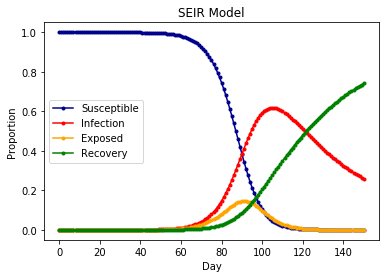

In [21]:
# Susceptible and infective population proportion
def funcSEIR(prop,_):
    Y = np.zeros(4) # Y[0] = s[t+1] - s[t], Y[1] = e[t+1] - e[t], Y[2] = i[t+1] - i[t], Y[3] = r[t+1]-r[t]
    X = prop # X[0] = s[t], X[1] = i[t], X[2] = e[t], X[3]=r[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] 
    # Infective proportion change
    Y[1] = sigma * X[2] - gamma * X[1]
    # Exposed proportion change
    Y[2] = lamda * X[0] * X[1] - sigma * X[2]
    # Remove proportion change
    Y[3] = gamma * X[1] 
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSEIR,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIR Model (Motality)

In [133]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Population
N = 1e7
# Simulation time / Day
T = 1500
# Contact rate
lamda = 0.2586
# Exposed to infective rate
sigma = 0.695
# Motality
die = 0.02
# Recovery rate
gamma = 0.035
# Immunity waning rate
# alpha = 0.6

# Infection rate
i = np.zeros([T])
# Initial infective proportion
i[0] = 1.0 / N
# Exposed rate
e = np.zeros([T])
# Initial exposed proportion
e[0] = 1.0 / N
# Recovery rate
r = np.zeros([T])
# Initial remove proportion
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible proportion
s = np.zeros([T])
# Initial susceptible proportion
s[0] = 1 - e[0] - i[0] - r[0]
# Motality
d = np.zeros([T])
# Initial motality
d[0] = 0
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],e[0],r[0],d[0])

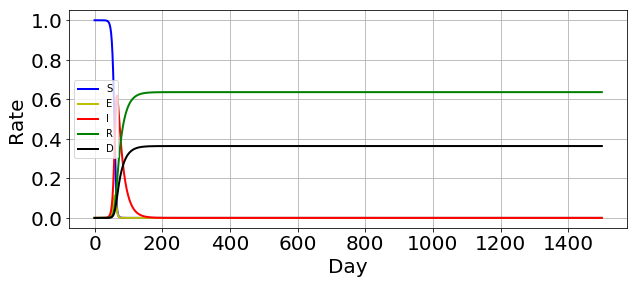

In [148]:
# Rate 
for t in range(T-1):
    s[t + 1] = s[t] - i[t] * lamda * s[t] 
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t] - die * i[t]
    r[t + 1] = r[t] + gamma * i[t]
    d[t + 1] = d[t] + die * i[t]

#  Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(e, c='y', lw=2, label='E')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.plot(d, c='black', lw=2, label='D')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Rate', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

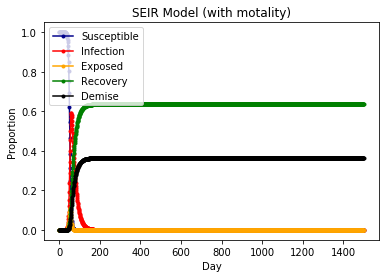

In [149]:
# Susceptible and infective population proportion
def funcSEIRD(prop,_):
    Y = np.zeros(5) # Y[0] = s[t+1] - s[t], Y[1] = e[t+1] - e[t], Y[2] = i[t+1] - i[t], Y[3] = r[t+1]-r[t], Y[4]=d[t+1]-d[t]
    X = prop # X[0] = s[t], X[1] = i[t], X[2] = e[t], X[3]=r[t], X[4]=d[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] 
    # Infective proportion change
    Y[1] = sigma * X[2] - gamma * X[1] - die * X[1]
    # Exposed proportion change
    Y[2] = lamda * X[0] * X[1] - sigma * X[2]
    # Remove proportion change
    Y[3] = gamma * X[1] 
    # Motality change
    Y[4] = die * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSEIRD,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.plot(RES[:,4],color = 'black',label = 'Demise',marker = '.')
plt.title('SEIR Model (with motality)')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIRD using PyGOM 

In [4]:
# PyGOM 
from pygom import SimulateOde, Transition, TransitionType
import matplotlib.pyplot as plt
from pygom import DeterministicOde

In [5]:
sir_t1 = Transition (origin = ’S ’, 
                     destination = ’I ’, 
                     equation = ’ beta *S*I/N ’ , 
                     transition_type = TransitionType .T)

sir_t2 = Transition ( ’I ’, ’ gamma *I ’, ’T ’, ’R ’)

states = [ ’S ’ , ’I ’, ’R ’]
params = [ ’ beta ’, ’ gamma ’, ’N ’]

model = DeterministicOde (states, params, transition =[ sir_t1 , sir_t2 ])
model . get_ode_eqn ()

SyntaxError: invalid character in identifier (<ipython-input-5-3dcecb3d7b24>, line 1)

In [99]:
#SEIRD Model
stateList = ['S', 'E', 'I', 'R', 'D']

paramList = ['beta', 'sigma', 'gamma', 'alpha', 'N']

odeList = [
            Transition(origin='S', equation='- beta*S/N*I', transition_type=TransitionType.ODE),
            Transition(origin='E', equation='beta*S/N*I - sigma*E', transition_type=TransitionType.ODE),
            Transition(origin='I', equation='sigma*E - gamma*I - alpha*I', transition_type=TransitionType.ODE),
            Transition(origin='R', equation='gamma*I', transition_type=TransitionType.ODE),
            Transition(origin='D', equation='alpha*I', transition_type=TransitionType.ODE) ]

In [50]:
ode = SimulateOde(stateList, paramList, ode=odeList)

In [51]:
ode.get_transition_matrix()

Matrix([
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

In [52]:
ode2 = ode.get_unrolled_obj()

In [53]:
ode2.get_transition_matrix()

Matrix([
[0, I*S*beta/N,       0,       0,       0],
[0,          0, E*sigma,       0,       0],
[0,          0,       0, I*gamma, I*alpha],
[0,          0,       0,       0,       0],
[0,          0,       0,       0,       0]])

In [54]:
ode2.get_ode_eqn()

Matrix([
[                -I*S*beta/N],
[      -E*sigma + I*S*beta/N],
[E*sigma - I*alpha - I*gamma],
[                    I*gamma],
[                    I*alpha]])

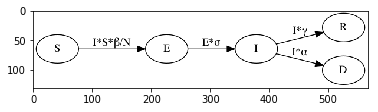

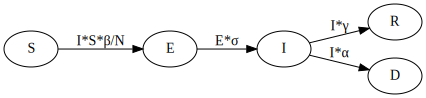

In [55]:
ode2.get_transition_graph()

In [56]:
print(sum(ode.get_ode_eqn() - ode2.get_ode_eqn()).simplify()) # difference

0


In [350]:
# Parameter estimation and testing model fit
from pygom import SquareLoss
import numpy as np
import scipy.integrate
import matplotlib.pyplot

# initialize the model
# 'beta', 'sigma', 'gamma', 'alpha', 'N'
ode.parameters = [0.2586, 0.695, 0.5, 0.02, 1e7]

# Initial values of states
x0 = [1e7, 1, 1, 0, 0] 
# Time, including the initial time t0 at t=0
t = [0, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65] 
# S, E, I, R, D
y = np.array([[1e7-1, 1, 1, 0, 0],
     [1e7-8686,5794,2761,51,80], 
     [1e7-11674,6973,4535,60,106], 
     [1e7-15471,9239,5997,103,132], 
     [1e7-20199,12167,7736,126,170], 
     [1e7-25342,15238,9720,171,213],
     [1e7-30311,17988,11821,243,259],
     [1e7-34587,19544,14411,328,304],
     [1e7-39632,21558,17238,475,361],
     [1e7-44742,23214,20471,632,425],
     [1e7-49006,23260,24363,892,491]
    ])
ode.initial_values = (x0, t[0])
solutionReference = ode.integrate(t[1::], full_output=False)
    
# our initial guess
theta = [0.53, 0.43, 0.21, 0.02, 1e7]
objSEIRD = SquareLoss(theta=theta, ode=ode, x0=x0, t0=t[0], t=t[1::], y=y[1::], state_name=['S','E','I','R','D'])

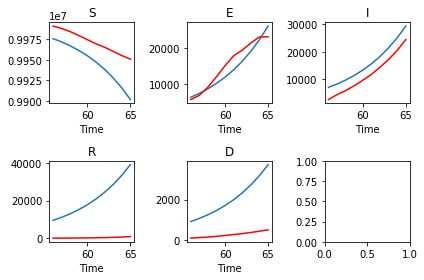

In [351]:
objSEIRD.plot()

In [293]:
objSEIRD.sensitivity()

array([ 1.30342269e+12,  5.15821632e+11, -1.72037615e+12, -1.77013123e+12,
       -6.90814025e+04])

In [289]:
from scipy.optimize import minimize

# what we think the bounds are
boxBounds = [(0.0,1.0),(0.0,1.0),(0.0, 1.0),(0.0, 1.0), (1e7, 1e7)]
theta_hat = minimize(fun=objSEIRD.cost,
                jac=objSEIRD.sensitivity,
                x0=theta,
                bounds=boxBounds,
                method='SLSQP')
print(theta_hat)

     fun: 15618401780.847195
     jac: array([ 1.30342269e+12,  5.15821632e+11, -1.72037615e+12, -1.77013123e+12,
       -6.90814025e+04])
 message: 'Inequality constraints incompatible'
    nfev: 1
     nit: 1
    njev: 1
  status: 4
 success: False
       x: array([5.3e-01, 4.0e-01, 2.0e-01, 2.0e-02, 1.0e+07])


In [290]:
1.11日41例
1.18日45例
1.19日62例
1.20日291例
1.21日440例
1.22日571例
1.23日830例
1.24日1287例
1.25日1975例
1.26日2744例
1.27日4515例
1.28日5976例
1.29日7711例
1.30日9692例
1.31日11791例

SyntaxError: invalid syntax (<ipython-input-290-d6db4074b8b3>, line 1)

# Ro